In [1]:
import functions as func
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import numpy as np
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


register_matplotlib_converters()
data = pd.read_csv('../data/pd_speech_features.csv', skiprows=[0])
data.shape

(756, 755)

<Figure size 360x288 with 0 Axes>

# alterações de lab3

In [2]:
corr_data = func.red_correlations(data, tr=0.75)

##########################################################

ddata_norm = func.normalize(corr_data, ['class','gender'])
data_norm = func.normalize(data, ['class','gender'])

##########################################################

ddata_smote =func.smote_split(ddata_norm, 'class',random_state=32)
data_smote  =func.smote_split(data_norm, 'class',random_state=32)

##########################################################

ddf = ddata_smote
df = data_smote

for i in ddf:
    print(i.shape)

    
for i in df:
    print(i.shape)

(790, 568)
(790, 1)
(227, 568)
(227, 1)
(2,)
(790, 754)
(790, 1)
(227, 754)
(227, 1)
(2,)


/home/andre/anaconda3/envs/cd-master/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/andre/anaconda3/envs/cd-master/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/andre/anaconda3/envs/cd-master/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/andre/anaconda3/envs/cd-master/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1 0] as keyword args. From version 0.2

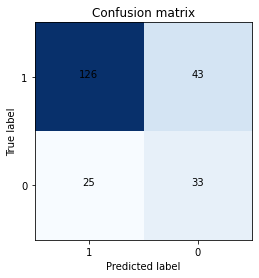

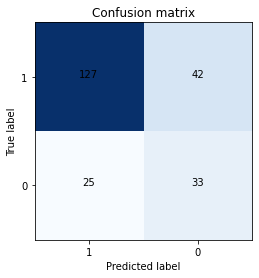

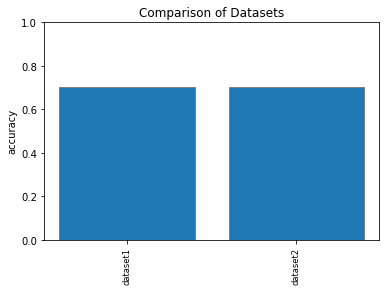

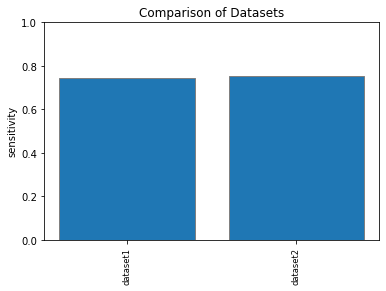

In [3]:
clf1 = BernoulliNB()
clf2 = BernoulliNB()

func.compare_datasets(clf1, clf2, ddata_smote, data_smote)

In [4]:
df = ddata_smote

<Figure size 432x288 with 0 Axes>

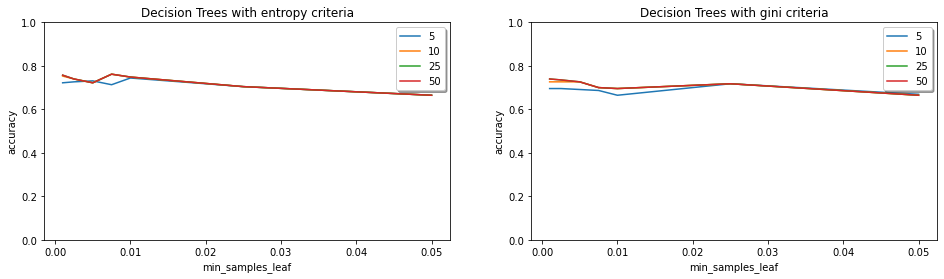

In [5]:
trnX, trnY, tstX, tstY = df[0], df[1], df[2], df[3]

min_samples_leaf = [.05, .025, .01, .0075, .005, .0025, .001]
max_depths = [5, 10, 25, 50]
criteria = ['entropy', 'gini']

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for n in min_samples_leaf:
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f,random_state=52)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
        values[d] = yvalues
    func.multiple_line_chart(axs[0, k], min_samples_leaf, values, 'Decision Trees with %s criteria'%f, 'min_samples_leaf', 
                             'accuracy', percentage=True)
    
plt.show()

<Figure size 432x288 with 0 Axes>

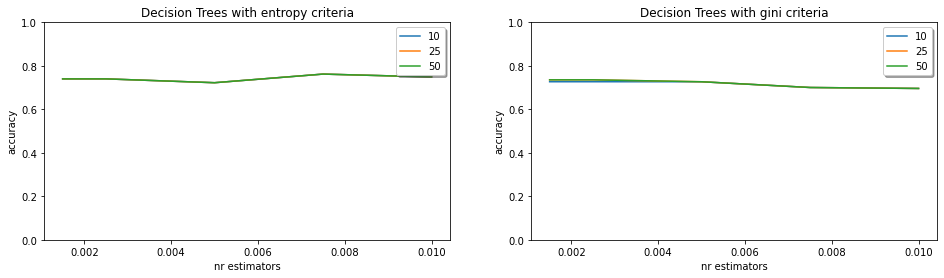

In [6]:
min_samples_leaf = [.01,.0075, .005,.0025, .0015]
max_depths = [10, 25, 50]
criteria = ['entropy', 'gini']

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for n in min_samples_leaf:
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f,random_state=52)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
        values[d] = yvalues
    func.multiple_line_chart(axs[0, k], min_samples_leaf, values, 'Decision Trees with %s criteria'%f, 'nr estimators', 
                             'accuracy', percentage=True)
    
plt.show()

<Figure size 432x288 with 0 Axes>

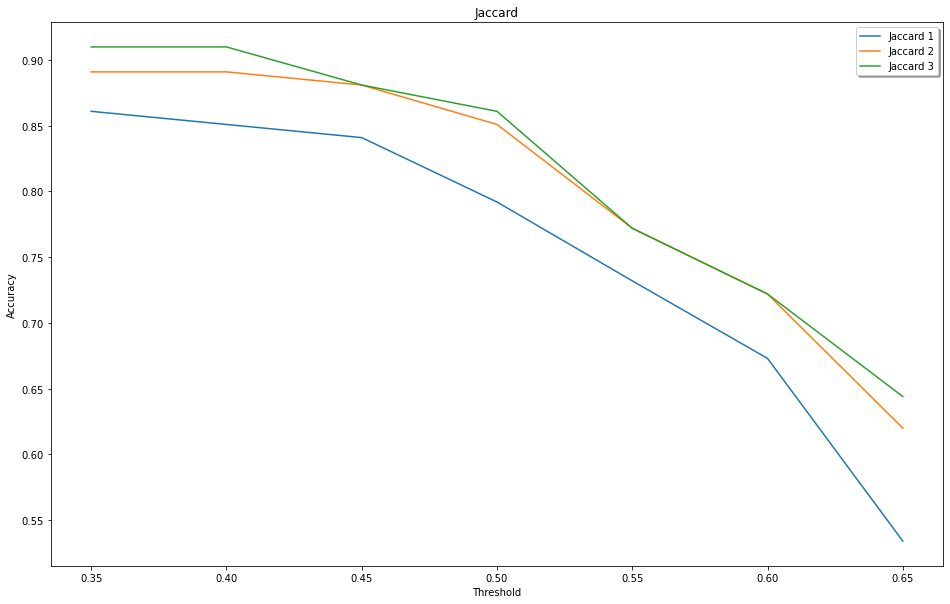

In [7]:
trs = [0.35, 0.4, 0.45, 0.50, 0.55, 0.6, 0.65]
#max_depths = ["Jaccard 1", "Jaccard 2", "Jaccard 3"]
criteria = ['entropy', 'gini']
values ={"Jaccard 1": [0.861,0.851,0.841,0.792,0.732,0.673,0.534], 
        "Jaccard 2": [0.891,0.891,0.881,0.851,0.772,0.722,0.62], 
        "Jaccard 3": [0.910,0.910,0.881,0.861,0.772,0.722,0.644,]}
plt.figure()
fig, axs = plt.subplots(1, 1, figsize=(16, 10), squeeze=False)
func.multiple_line_chart(axs[0, 0], trs, values, 'Jaccard', 'Threshold', 
                             'Accuracy', percentage=False)
    
plt.show()

<Figure size 432x288 with 0 Axes>

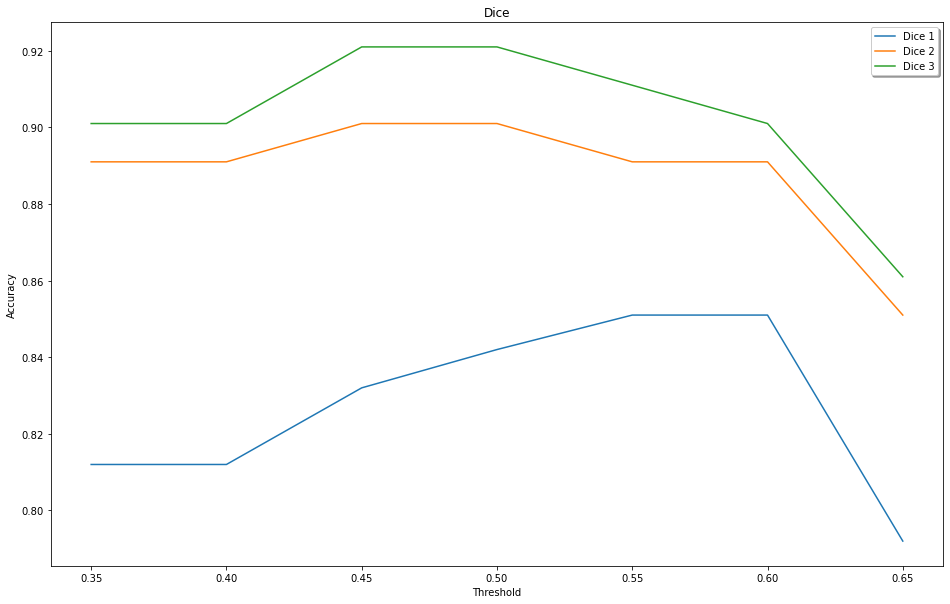

In [8]:
trs = [0.35, 0.4, 0.45, 0.50, 0.55, 0.6, 0.65]
max_depths = ["Dice 1", "Dice 2", "Dice 3"]
criteria = ['entropy', 'gini']
values ={"Dice 1": [0.812, 0.812, 0.832, 0.842, 0.851, 0.851, 0.792], 
        "Dice 2": [0.891, 0.891, 0.901, 0.901, 0.891, 0.891, 0.851], 
        "Dice 3": [0.901, 0.901, 0.921, 0.921, 0.911, 0.901, 0.861]}
plt.figure()
fig, axs = plt.subplots(1, 1, figsize=(16, 10), squeeze=False)
func.multiple_line_chart(axs[0, 0], trs, values, 'Dice', 'Threshold', 
                             'Accuracy', percentage=False)
    
plt.show()

<Figure size 432x288 with 0 Axes>

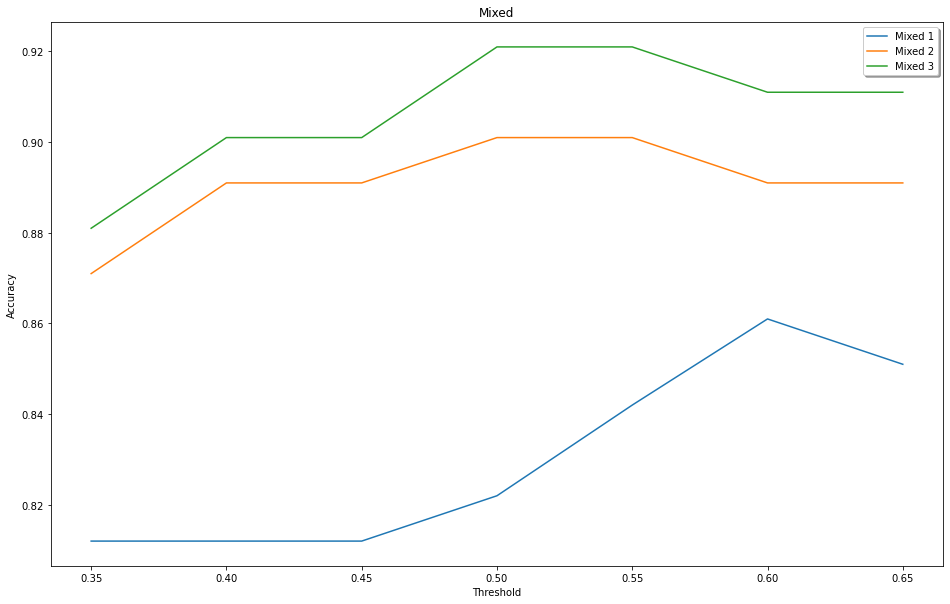

In [9]:
trs = [0.35, 0.4, 0.45, 0.50, 0.55, 0.6, 0.65]
max_depths = ["Dice 1", "Dice 2", "Dice 3"]
criteria = ['entropy', 'gini']
values ={"Mixed 1": [0.812, 0.812, 0.812, 0.822, 0.842, 0.861, 0.851], 
        "Mixed 2": [0.871, 0.891, 0.891, 0.901, 0.901, 0.891, 0.891], 
        "Mixed 3": [0.881, 0.901, 0.901, 0.921, 0.921, 0.911, 0.911]}
plt.figure()
fig, axs = plt.subplots(1, 1, figsize=(16, 10), squeeze=False)
func.multiple_line_chart(axs[0, 0], trs, values, 'Mixed', 'Threshold', 
                             'Accuracy', percentage=False)
    
plt.show()

In [10]:
parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'), 'min_samples_split':[2,3,4],
             'max_depth' :  [10, 25, 50], 'min_samples_leaf':[.05,.0075, .005,.0025, .0015]}
tree = DecisionTreeClassifier(random_state=52)
clf = GridSearchCV(tree, parameters, cv=5)
#clf.fit(trnX, trnY)
#prdY = clf.predict(tstX)

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(trnX, trnY)

    print("Best parameters set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    '''
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    '''
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = tstY, clf.predict(tstX)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set:

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 0.0015, 'min_samples_split': 4, 'splitter': 'random'}

Grid scores on development set:


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.50      0.78      0.61        58
           1       0.91      0.73      0.81       169

    accuracy                           0.74       227
   macro avg       0.70      0.75      0.71       227
weighted avg       0.80      0.74      0.76       227


# Tuning hyper-parameters for recall

Best parameters set:

{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 0.0015, 'min_samples_split': 3, 'splitter': 'random'}

Grid scores on development set:


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the 

# Best parameters set:

####   '{'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 0.0015, 'min_samples_split': 3, 'splitter': 'random'}

/home/andre/anaconda3/envs/cd-master/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/andre/anaconda3/envs/cd-master/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


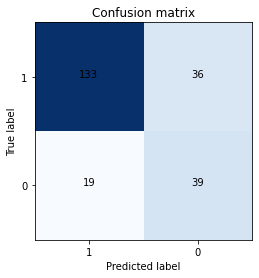

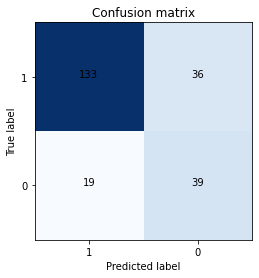

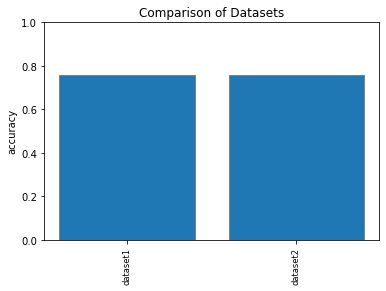

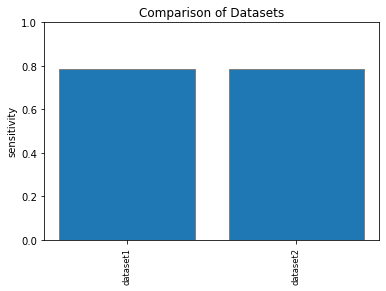

In [11]:
tree1 = DecisionTreeClassifier(criterion='entropy',max_depth=50, min_samples_leaf=0.0015, 
                              min_samples_split=3, splitter='random',random_state=30)
tree1 = DecisionTreeClassifier(criterion='entropy',max_depth=50, min_samples_leaf=0.0015, 
                              min_samples_split=3, splitter='random',random_state=30)
func.compare_datasets(tree1, tree1, df, df)

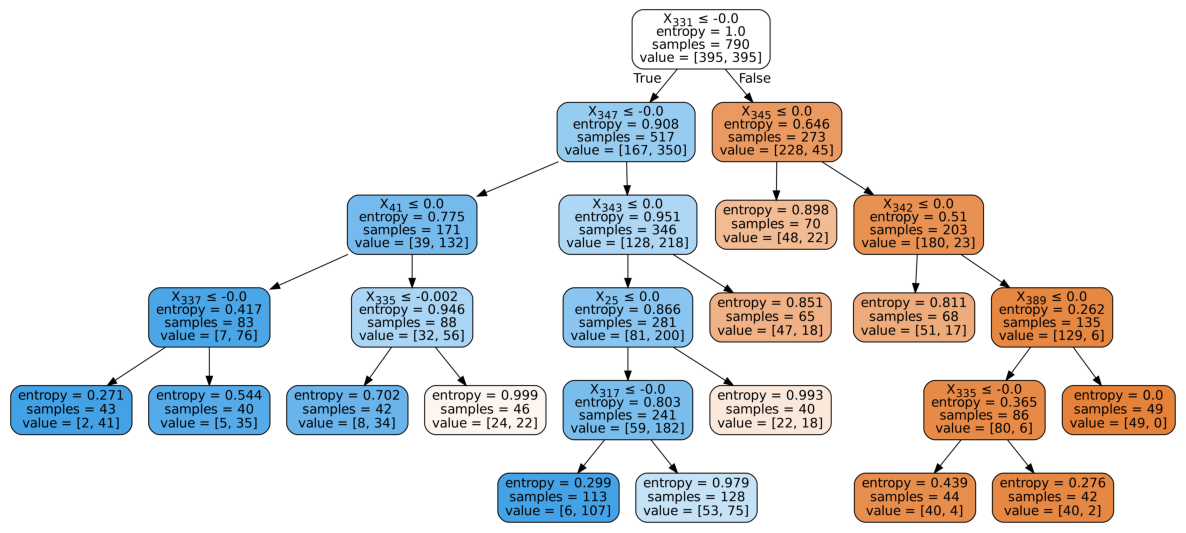

In [12]:
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_leaf=0.05, 
                              min_samples_split=4, splitter='random',random_state=52)
tree.fit(trnX, trnY)

dot_data = export_graphviz(tree, out_file='dtree.dot', filled=True, rounded=True, special_characters=True)  
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

plt.figure(figsize = (21, 27))
plt.imshow(plt.imread('dtree.png'))
plt.axis('off')
plt.show()